In [1]:
import pandas as pd
import numpy as np 

In [2]:
df =pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1726,ham,\ALRITE HUNNY!WOT U UP 2 2NITE? DIDNT END UP G...,NaN,NaN,NaN
1068,spam,Someone U know has asked our dating service 2 ...,NaN,NaN,NaN
247,ham,Kallis wont bat in 2nd innings.,NaN,NaN,NaN
1722,ham,Thought praps you meant another one. Goodo! I'...,NaN,NaN,NaN
1954,ham,Good night. Am going to sleep.,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

1. Data Cleaning 
2. EDA
3. Text preprocessing 
4. Model Building 
5. Evaluation 
6. Improvement 
7. Website 
8. Deploy

1. DATA CLEANING 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns 
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [8]:
df.sample(5)

,v1,v2
580,ham,Huh so early.. Then Ì_ having dinner outside i...
4134,ham,No need to say anything to me. I know i am an ...
3470,ham,Heart is empty without love.. Mind is empty wi...
2911,ham,You didn't have to tell me that...now i'm thin...
3672,ham,Moji just informed me that you saved our lives...


In [9]:
# renaming columns 
df.rename(columns= {'v1':'target', 'v2': 'text' },  inplace = True)
df.sample(5)

,target,text
4204,spam,IMPORTANT INFORMATION 4 ORANGE USER 0796XXXXXX...
3577,ham,They said Ì_ dun haf passport or smth like dat...
38,ham,Anything lor... U decide...
3487,ham,Still i have not checked it da. . .
5369,ham,Hi mom we might be back later than &lt;#&gt;


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# mising values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values 
df.duplicated().sum()

403

In [15]:
# remove duplicates
df =df.drop_duplicates(keep= 'first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

EDA

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

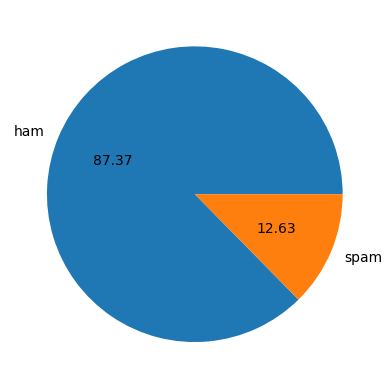

In [19]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [20]:
# data is imbalance 

In [21]:
# now we will explore the lengths in the text, for that we we create 3 new columns 
# 1. no of characters in text
# 2. no of words in text
# 3. no of sentences in the text

In [22]:
# pip install nltk

In [23]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

df['num_words'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_words,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",23,111
1,0,Ok lar... Joking wif u oni...,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,36,155
3,0,U dun say so early hor... U c already then say...,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61


In [26]:
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters


# Create and use the tokenizer
sentence_tokenizer = PunktSentenceTokenizer()

# Apply to your DataFrame
df['num_sentences'] = df['text'].apply(lambda x: len(sentence_tokenizer.tokenize(x)))

In [27]:
df.head()

,target,text,num_words,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",23,111,1
1,0,Ok lar... Joking wif u oni...,8,29,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,36,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [28]:
df.describe()

,target,num_words,num_characters,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,17.695299,78.977945,1.919714
std,0.332253,12.672457,58.236293,1.428215
min,0.000000,1.000000,2.000000,1.000000
25%,0.000000,9.000000,36.000000,1.000000
50%,0.000000,14.000000,60.000000,1.000000
75%,0.000000,25.000000,117.000000,2.000000
max,1.000000,214.000000,910.000000,38.000000


In [29]:
# ham 
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.452613,1.767715
std,56.358207,12.858450,1.353829
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,21.000000,2.000000
max,910.000000,214.000000,38.000000


In [30]:
# spam 
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,26.289433,2.970904
std,30.137753,6.579189,1.486363
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,28.000000,3.000000
75%,157.000000,30.000000,4.000000
max,224.000000,41.000000,9.000000


In [31]:
# pip install seaborn 

In [32]:
import seaborn as sns


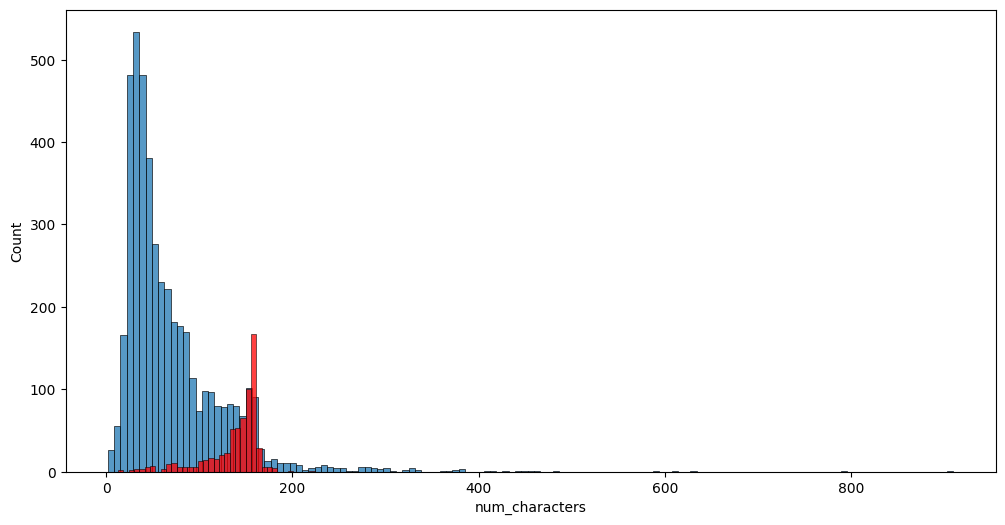

In [33]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color= 'Red')
plt.show()

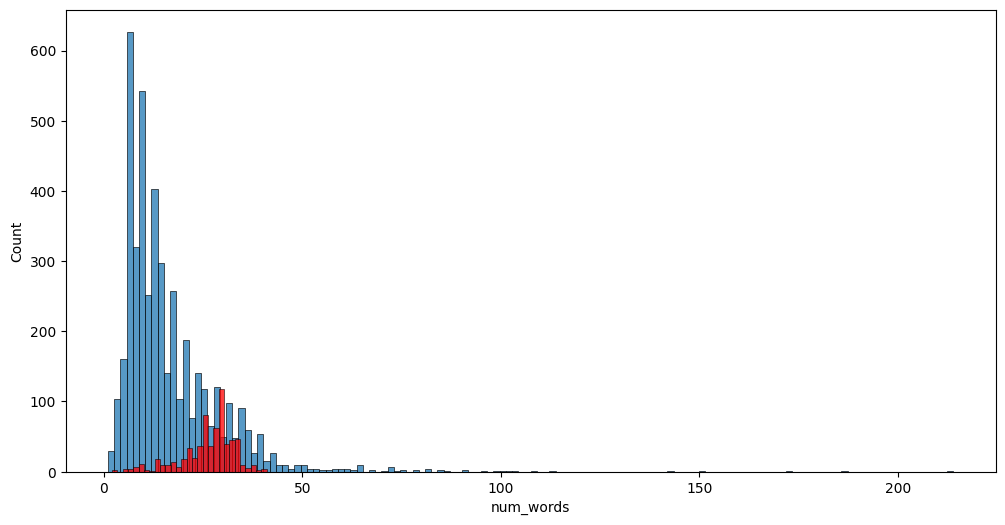

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color= 'Red')
plt.show()

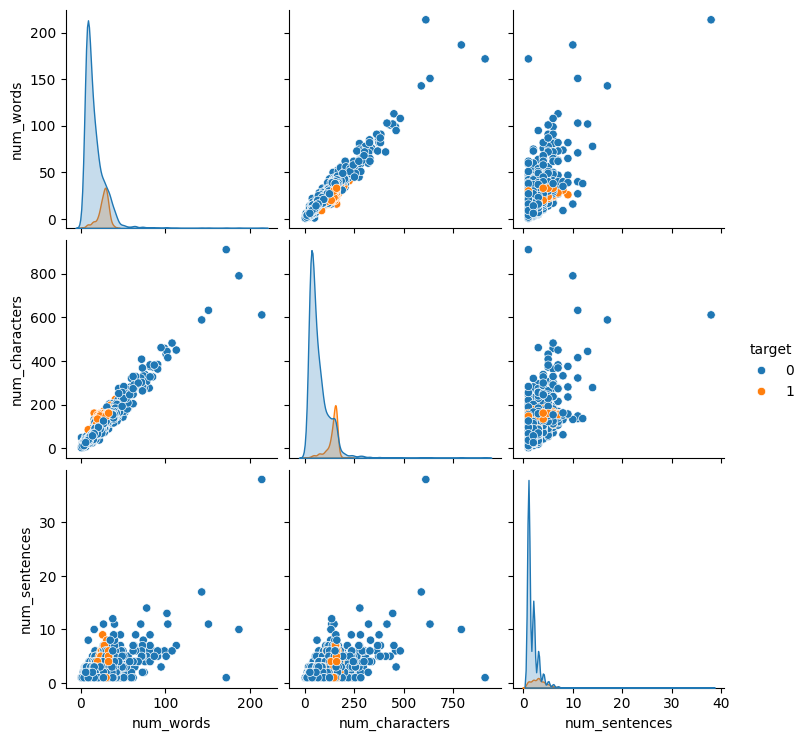

In [35]:
sns.pairplot(df, hue= 'target')

Cannot get much instights. there are outliers in the dataset

<Axes: >

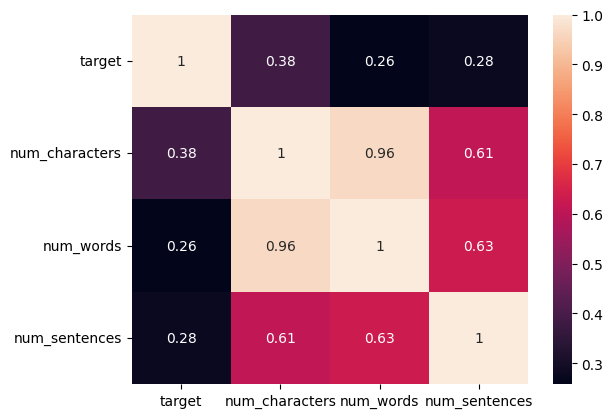

In [36]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(), annot= True)

'num_characters','num_words' and 'num_sentences'are highty correlated.
So only one out of these three should be used.
We will consider num_characters, since it has higts correlation with target when comapred to other two.

## Data/ Text Preprocessing 
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- stemming 

In [37]:
import sklearn

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

english_stopwords = ENGLISH_STOP_WORDS

In [38]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [40]:
def transform_text(text):
    # lower case
    text = text.lower()
    # tokenization
    text = tokenizer.tokenize(text)
    # removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text= y.copy()
    y.clear()
    # removing stop words and punctuation
    for i in text:
        if i not in english_stopwords and i not in string.punctuation:
            y.append(i) 

    text= y.copy()
    y.clear()
    # stemming data 
    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [41]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'jurong point avail bugi n great world la e buffet cine got amor wat'

In [42]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [43]:
df['transformed_text']=df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_words,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",23,111,1,jurong point avail bugi n great world la e buf...
1,0,Ok lar... Joking wif u oni...,8,29,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,36,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live


In [45]:
# creating the word cloud that helps in identifying most used messages in ham and spam

# !pip install wordcloud

In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [47]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep =" "))

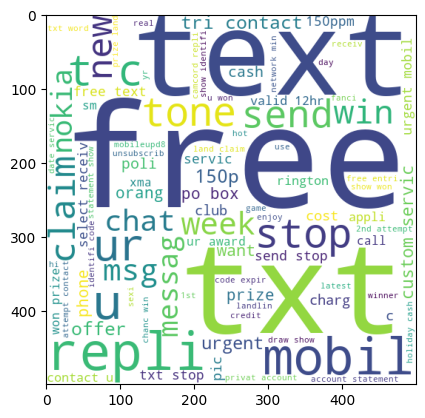

In [48]:
plt.imshow(spam_wc)

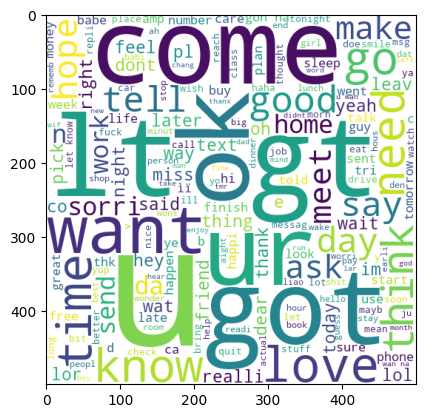

In [49]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep =" "))
plt.imshow(ham_wc)

In [50]:
# top 30 words used in spam messages 
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

8692

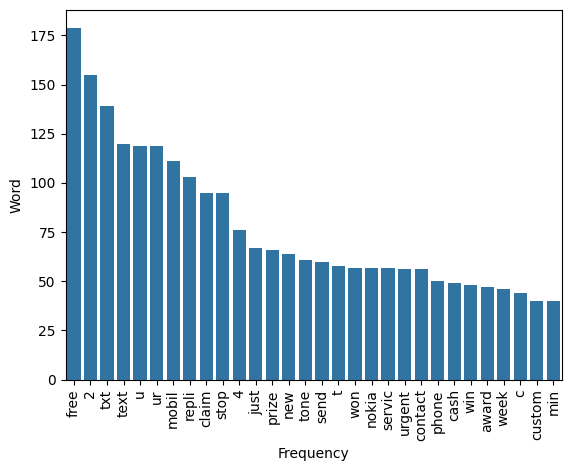

In [52]:
from collections import Counter
top_spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns= ['word', 'frequency'])
sns.barplot(x=top_spam['word'],y =top_spam['frequency'])
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.xticks(rotation ='vertical')
plt.show()

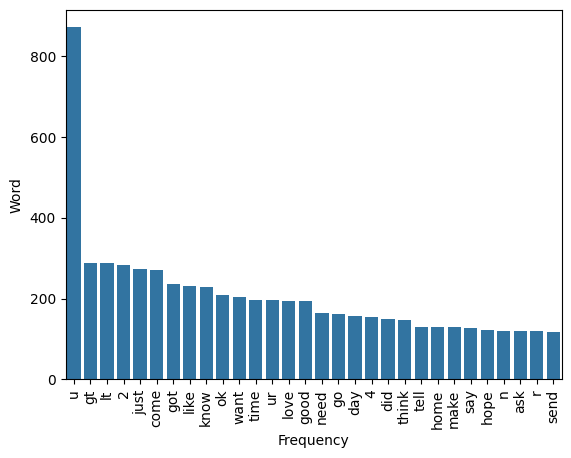

In [53]:
# top 30 words used in ham messages 
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

from collections import Counter
top_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns= ['word', 'frequency'])
sns.barplot(x=top_ham['word'],y =top_ham['frequency'])
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.xticks(rotation ='vertical')
plt.show()

In [54]:
len(ham_corpus)

29878

## MODEL BUILDING 

In [55]:
# for any model we need to input numerical inputs but "transformed text" is text format.
# So, we will use one those here  called bag of words

In [56]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()

In [57]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [58]:
X.shape

(5169, 6246)

In [59]:
y = df['target'].values

In [60]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [65]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8491295938104448
[[762 134]
 [ 22 116]]
0.464


In [66]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9680851063829787
[[875  21]
 [ 12 126]]
0.8571428571428571


In [67]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9738878143133463
[[892   4]
 [ 23 115]]
0.9663865546218487


In [68]:
tv = TfidfVectorizer()

In [ ]:

X = tv.fit_transform(df['transformed_text']).toarray()

In [70]:
X.shape

(5169, 6246)

In [71]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [73]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.844294003868472
[[763 133]
 [ 28 110]]
0.45267489711934156


In [74]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9574468085106383
[[896   0]
 [ 44  94]]
1.0


In [75]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9738878143133463
[[892   4]
 [ 23 115]]
0.9663865546218487


In [76]:
# tfidf --> MNB 

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb 

In [80]:
# pip install xgboost

In [83]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = 'liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb_clf = xgb.XGBClassifier(n_estimators=50, random_state=2)

In [84]:
clfs = {
    'SVC' : svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb' : xgb_clf
}

In [87]:
def train_classifier(clf, X_train,y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [88]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9661508704061895, 0.963963963963964)

In [89]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9661508704061895
Precision -  0.963963963963964
For  KN
Accuracy -  0.8965183752417795
Precision -  1.0
For  NB
Accuracy -  0.9574468085106383
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.872093023255814
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  0.9658119658119658
For  AdaBoost
Accuracy -  0.8965183752417795
Precision -  0.8974358974358975
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8951612903225806
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316


In [90]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [91]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
2,NB,0.957447,1.000000
8,ETC,0.974855,0.982759
5,RF,0.971954,0.965812
0,SVC,0.966151,0.963964
9,GBDT,0.943907,0.944444
4,LR,0.951644,0.940000
10,xgb,0.964217,0.931624
6,AdaBoost,0.896518,0.897436
7,BgC,0.961315,0.895161


# Model Improvement

In [96]:
# tv = TfidfVectorizer()
# X = tv.fit_transform(df['transformed_text']).toarray()

# we can use max_features (3000) in TfidfVectorizer 

In [97]:
# also, we can scale the X dataframe using min max scaler to get the values 
# we cannot use standard scalar since it gives negative value but NB does not accept negative values 

In [ ]:
# voting classifier can also be performed 
# apply stacking 

In [98]:
# Pipeline process 
# 1. Tranform 
# 2. Vectorize 
# 3. applying ML algorithm 

In [99]:
import pickle 
pickle.dump(tv, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open("model.pkl", 'wb'))